In [1]:
pip install scikit-criteria

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
matrix = [[53715,1780,49,0.2185,4,4,1680], 
          [45990,2150,44,0.1119,5,4,1350],
          [44990,1890,43,0.07708,3,3,1500],
          [48790,2020,37,0.0747,4,4,1800],
          [41058,1930,38,0.0834,3,2,1370]]
matrix

[[53715, 1780, 49, 0.2185, 4, 4, 1680],
 [45990, 2150, 44, 0.1119, 5, 4, 1350],
 [44990, 1890, 43, 0.07708, 3, 3, 1500],
 [48790, 2020, 37, 0.0747, 4, 4, 1800],
 [41058, 1930, 38, 0.0834, 3, 2, 1370]]

In [3]:
objectives = [min,min,min,min,max,max,min]
objectives

[<function min>,
 <function min>,
 <function min>,
 <function min>,
 <function max>,
 <function max>,
 <function min>]

In [4]:
import skcriteria as skc
dm = skc.mkdm(matrix,objectives)
dm

,C0[▼ 1.0],C1[▼ 1.0],C2[▼ 1.0],C3[▼ 1.0],C4[▲ 1.0],C5[▲ 1.0],C6[▼ 1.0]
A0,53715,1780,49,0.21850,4,4,1680
A1,45990,2150,44,0.11190,5,4,1350
A2,44990,1890,43,0.07708,3,3,1500
A3,48790,2020,37,0.07470,4,4,1800
A4,41058,1930,38,0.08340,3,2,1370


In [5]:
dm = skc.mkdm(matrix,
        objectives,
        alternatives=["X1", "X2","X3", "X4","X5"],
        criteria=['Cost','PowerConsumption','Noise','Size','Warranty','CompanyPerformance','MaintainancePrice'],
)
dm

,Cost[▼ 1.0],PowerConsumption[▼ 1.0],Noise[▼ 1.0],Size[▼ 1.0],Warranty[▲ 1.0],CompanyPerformance[▲ 1.0],MaintainancePrice[▼ 1.0]
X1,53715,1780,49,0.21850,4,4,1680
X2,45990,2150,44,0.11190,5,4,1350
X3,44990,1890,43,0.07708,3,3,1500
X4,48790,2020,37,0.07470,4,4,1800
X5,41058,1930,38,0.08340,3,2,1370


In [6]:
dm.objectives

Cost                  MIN
PowerConsumption      MIN
Noise                 MIN
Size                  MIN
Warranty              MAX
CompanyPerformance    MAX
MaintainancePrice     MIN
Name: Objectives, dtype: object

In [7]:
dm = skc.mkdm(
matrix,
objectives,
weights=[0.142852,0.142852,0.142852,0.142852,0.142852,0.142852,0.142852],
alternatives=["X1", "X2","X3", "X4","X5"],
criteria=['Cost','PowerConsumption','Noise','Size','Warranty','CompanyPerformance','MaintainancePrice'],)

dm

,Cost[▼ 0.142852],PowerConsumption[▼ 0.142852],Noise[▼ 0.142852],Size[▼ 0.142852],Warranty[▲ 0.142852],CompanyPerformance[▲ 0.142852],MaintainancePrice[▼ 0.142852]
X1,53715,1780,49,0.21850,4,4,1680
X2,45990,2150,44,0.11190,5,4,1350
X3,44990,1890,43,0.07708,3,3,1500
X4,48790,2020,37,0.07470,4,4,1800
X5,41058,1930,38,0.08340,3,2,1370


In [8]:
dm.weights

Cost                  0.142852
PowerConsumption      0.142852
Noise                 0.142852
Size                  0.142852
Warranty              0.142852
CompanyPerformance    0.142852
MaintainancePrice     0.142852
Name: Weights, dtype: float64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

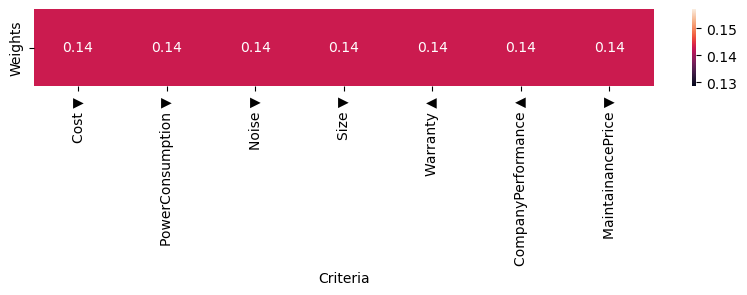

In [39]:
fig,ax = plt.subplots(figsize=(10,5),facecolor='white')
dm.plot.wheatmap()
plt.show()

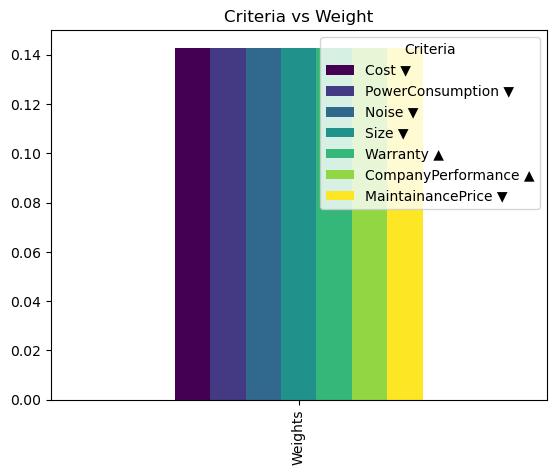

In [11]:
dm.plot.wbar(cmap="viridis");
plt.title('Criteria vs Weight')
plt.show()

In [12]:
from skcriteria.preprocessing import invert_objectives, scalers
inverter = invert_objectives.InvertMinimize()
dmt = inverter.transform(dm)
dmt

,Cost[▲ 0.142852],PowerConsumption[▲ 0.142852],Noise[▲ 0.142852],Size[▲ 0.142852],Warranty[▲ 0.142852],CompanyPerformance[▲ 0.142852],MaintainancePrice[▲ 0.142852]
X1,0.000019,0.000562,0.020408,4.576659,4,4,0.000595
X2,0.000022,0.000465,0.022727,8.936550,5,4,0.000741
X3,0.000022,0.000529,0.023256,12.973534,3,3,0.000667
X4,0.000020,0.000495,0.027027,13.386881,4,4,0.000556
X5,0.000024,0.000518,0.026316,11.990408,3,2,0.000730


In [13]:
scaler = scalers.SumScaler(target="both")
dmt = scaler.transform(dmt)
dmt

,Cost[▲ 0.142857],PowerConsumption[▲ 0.142857],Noise[▲ 0.142857],Size[▲ 0.142857],Warranty[▲ 0.142857],CompanyPerformance[▲ 0.142857],MaintainancePrice[▲ 0.142857]
X1,0.173277,0.218667,0.170446,0.088243,0.210526,0.235294,0.181026
X2,0.202382,0.181036,0.189815,0.172307,0.263158,0.235294,0.225277
X3,0.206881,0.205940,0.194229,0.250145,0.157895,0.176471,0.202750
X4,0.190768,0.192686,0.225725,0.258115,0.210526,0.235294,0.168958
X5,0.226693,0.201672,0.219785,0.231189,0.157895,0.117647,0.221989


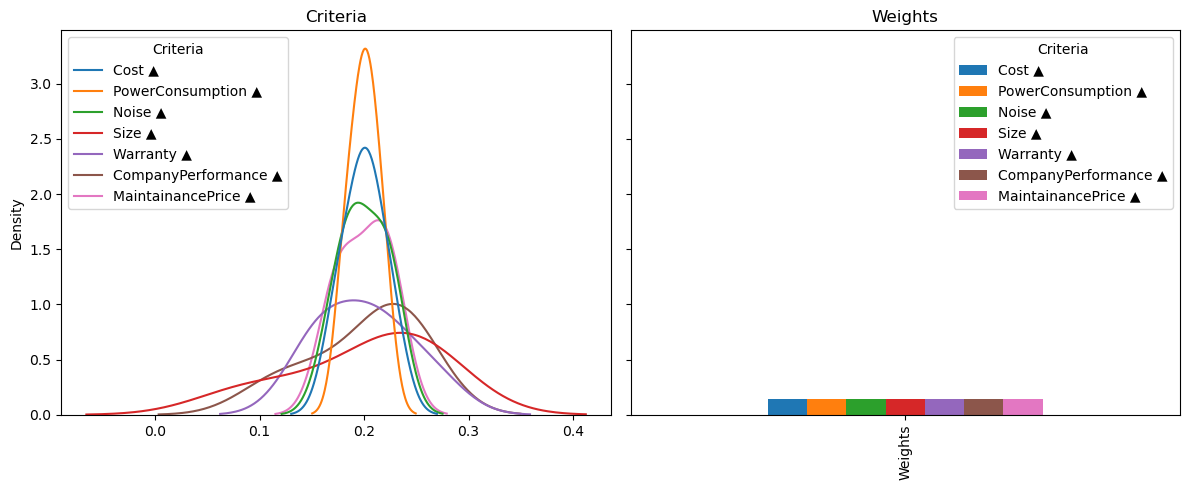

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
# in the first axis we plot the criteria KDE
dmt.plot.kde(ax=axs[0])
axs[0].set_title("Criteria")
# in the second axis we plot the weights as bars
dmt.plot.wbar(ax=axs[1])
axs[1].set_title("Weights")
# adjust the layout of the figute based on the content
fig.tight_layout()


In [15]:
dmt.weights


Cost                  0.142857
PowerConsumption      0.142857
Noise                 0.142857
Size                  0.142857
Warranty              0.142857
CompanyPerformance    0.142857
MaintainancePrice     0.142857
Name: Weights, dtype: float64

In [16]:
from skcriteria.pipeline import mkpipe
from skcriteria.preprocessing.invert_objectives import (
InvertMinimize,
NegateMinimize,
)
from skcriteria.preprocessing.filters import FilterNonDominated
from skcriteria.preprocessing.scalers import SumScaler,VectorScaler
from skcriteria.madm.simple import WeightedProductModel, WeightedSumModel
from skcriteria.madm.similarity import TOPSIS
from skcriteria.madm.moora import MultiMOORA
ws_pipe = mkpipe(
InvertMinimize(),
FilterNonDominated(),
SumScaler(target="weights"),
VectorScaler(target="matrix"),
WeightedSumModel(),
)
wp_pipe = mkpipe(
InvertMinimize(),
FilterNonDominated(),
SumScaler(target="weights"),
VectorScaler(target="matrix"),
WeightedProductModel(),
)
tp_pipe = mkpipe(
NegateMinimize(),
FilterNonDominated(),
SumScaler(target="weights"),
VectorScaler(target="matrix"),
TOPSIS(),
)

In [17]:
wsum_result = ws_pipe.evaluate(dm)
wprod_result = wp_pipe.evaluate(dm)
tp_result = tp_pipe.evaluate(dm)
display(wsum_result, wprod_result, tp_result)

Alternatives,X1,X2,X3,X4,X5
Rank,5,2,3,1,4


Alternatives,X1,X2,X3,X4,X5
Rank,5,2,3,1,4


Alternatives,X1,X2,X3,X4,X5
Rank,5,2,3,1,4


In [18]:
from skcriteria.cmp import RanksComparator, mkrank_cmp
RanksComparator([("ts", tp_result), ("ws", wsum_result), ("wp", wprod_result)])

<RanksComparator [ranks=['ts', 'ws', 'wp']]>

In [19]:
rcmp = mkrank_cmp(tp_result, wsum_result, wprod_result)
rcmp

<RanksComparator [ranks=['TOPSIS', 'WeightedSumModel', 'WeightedProductModel']]>

In [20]:
rcmp.corr() 

Method,TOPSIS,WeightedSumModel,WeightedProductModel
Method,,,
TOPSIS,1.0,1.0,1.0
WeightedSumModel,1.0,1.0,1.0
WeightedProductModel,1.0,1.0,1.0


In [21]:
rcmp.r2_score()

Method,TOPSIS,WeightedSumModel,WeightedProductModel
Method,,,
TOPSIS,1.0,1.0,1.0
WeightedSumModel,1.0,1.0,1.0
WeightedProductModel,1.0,1.0,1.0


In [22]:
rcmp.to_dataframe()

Method,TOPSIS,WeightedSumModel,WeightedProductModel
Alternatives,,,
X1,5,5,5
X2,2,2,2
X3,3,3,3
X4,1,1,1
X5,4,4,4


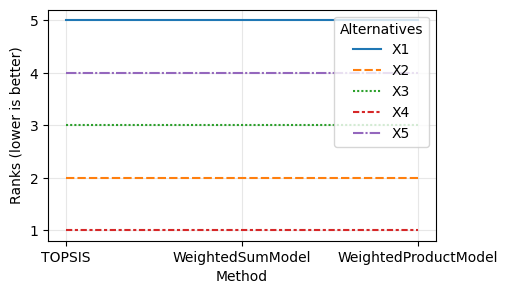

In [34]:
fig,ax = plt.subplots(figsize=(5,3))
rcmp.plot.flow();

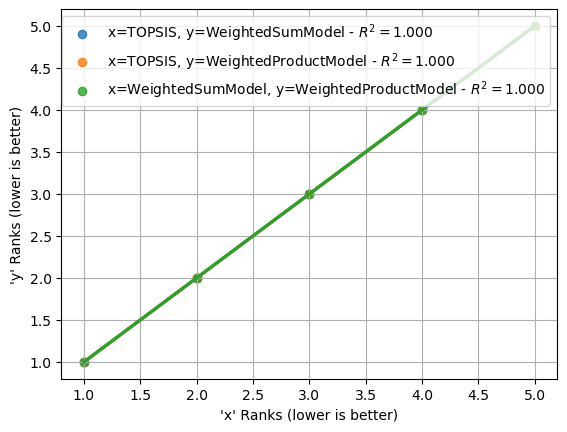

In [24]:
rcmp.plot.reg(r2=True, r2_fmt=".3f");
plt.grid()

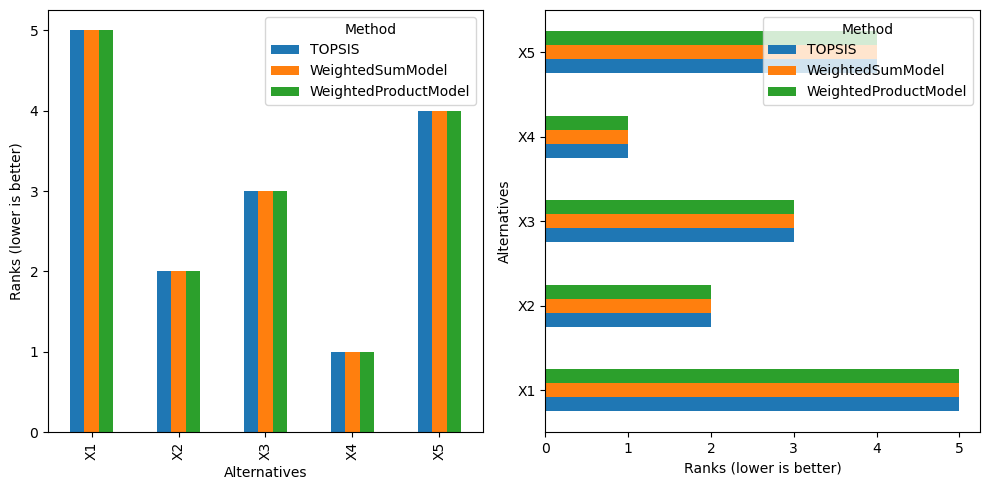

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
rcmp.plot.bar(ax=axs[0])
rcmp.plot.barh(ax=axs[1])
fig.tight_layout();

# Data Import for Plotting Graph

In [26]:
#import warnings
#warnings.simplefilter(action='ignore',category='Warning')

In [27]:
table = pd.read_csv('C:/Users/CHANDAN/Desktop/Book1.csv')
table

,Criteria,Cost,PowerConsumption,Noise,Size,Warranty,CompanyPerformance,MaintainanceCost
0,X1,53715,1780,49,0.21850,4,4,1680
1,X2,45990,2150,44,0.11190,5,4,1350
2,X3,44990,1890,43,0.07708,3,3,1500
3,X4,48790,2020,37,0.07470,4,4,1800
4,X5,41058,1930,38,0.08340,3,2,1370


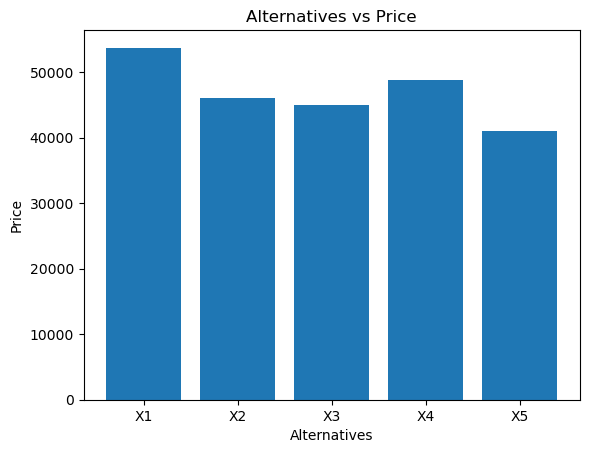

In [28]:
plt.bar(table.Criteria,table.Cost)
plt.xlabel('Alternatives')
plt.ylabel('Price')
plt.title('Alternatives vs Price')
plt.show()

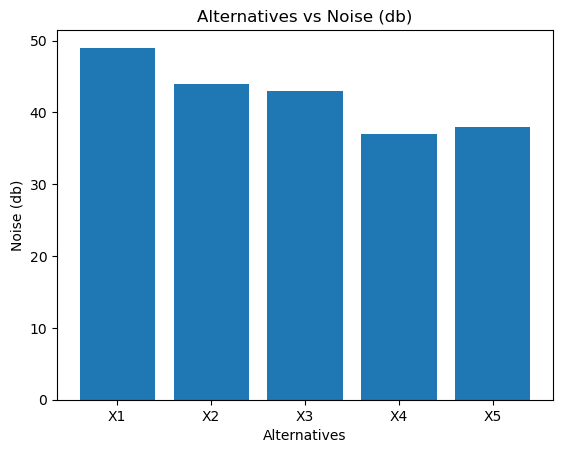

In [29]:
plt.bar(table.Criteria,table.Noise)
plt.xlabel('Alternatives')
plt.ylabel('Noise (db)')
plt.title('Alternatives vs Noise (db)')
plt.show()

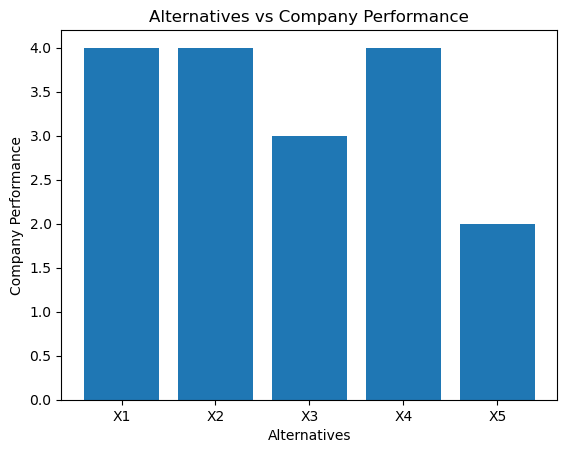

In [30]:
plt.bar(table.Criteria,table.CompanyPerformance)
plt.xlabel('Alternatives')
plt.ylabel('Company Performance')
plt.title('Alternatives vs Company Performance')
plt.show()

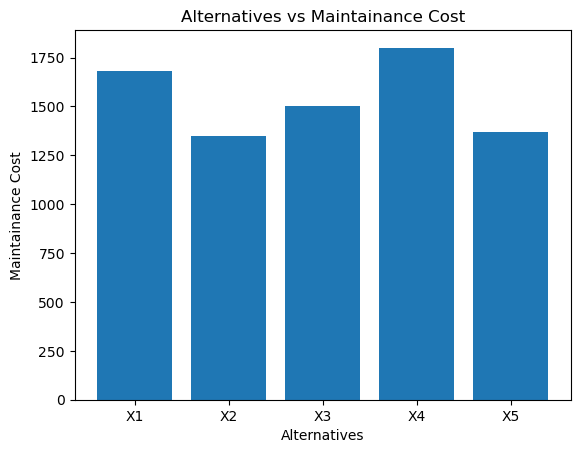

In [31]:
plt.bar(table.Criteria,table.MaintainanceCost)
plt.xlabel('Alternatives')
plt.ylabel('Maintainance Cost')
plt.title('Alternatives vs Maintainance Cost')
plt.show()